## Load Data from CSVs

In [3]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [4]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader) 
daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key']=engagement_record['acct']
    del[engagement_record['acct']]


In [9]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)

## Problems in the Data

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
no_of_surprising_dt_pts = 0
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_engagement_students:
        if(enrollment['join_date']!=enrollment['cancel_date']):
            no_of_surprising_dt_pts = no_of_surprising_dt_pts + 1
no_of_surprising_dt_pts

3

## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

non_udacity_engagement


[{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 11.6793745,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 37.2848873333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 53.6337463333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 33.4892696667,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 13, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 64.7796776667,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': 

## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if(not enrollment['is_canceled'] or enrollment['days_to_cancel']>7 ):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key]=enrollment_date
len(paid_students)


995

## Getting Data from First Week

In [25]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0 

In [26]:
def remove_free_cancels(data):
    data_pts = []
    for data_points in data:
        if(data_points['account_key'] in paid_students):
            data_pts.append(data_points)
    return data_pts

In [27]:
paid_enrollments = remove_free_cancels(non_udacity_enrollments)
paid_engagements = remove_free_cancels(non_udacity_engagement)
paid_submissions = remove_free_cancels(non_udacity_submissions)
len(paid_enrollments)
len(paid_engagements)

134549

In [28]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
sum = 0
for engagements in paid_engagements:
    account_key = engagements['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagements['utc_date']
    if(within_one_week(join_date,engagement_date)):
        paid_engagement_in_first_week.append(engagements)
    
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [29]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
engagement_by_account

defaultdict(list,
            {'0': [{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 11.6793745,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 37.2848873333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 53.6337463333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 33.4892

In [30]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
total_minutes_by_account

{'0': 494.88049616599994,
 '1': 18.576384666670002,
 '2': 0.0,
 '3': 0.0,
 '4': 33.3214046667,
 '5': 329.7578566663,
 '6': 780.4545511666701,
 '7': 104.20388850009999,
 '8': 989.113641833,
 '9': 448.471384167,
 '10': 130.12347833367,
 '11': 0.0,
 '12': 179.4719088333,
 '13': 1013.3833969996999,
 '14': 65.6221875,
 '15': 983.375040335,
 '16': 119.12030049999998,
 '17': 235.49969150033,
 '18': 155.1361575,
 '19': 0.0,
 '20': 447.93897783336996,
 '21': 931.1036911666699,
 '22': 657.2052335000001,
 '23': 1591.3228143334,
 '24': 943.188117167,
 '25': 0.0,
 '26': 430.801675833,
 '27': 1579.12122666663,
 '28': 766.256315667,
 '29': 556.1906033333,
 '30': 69.6578351667,
 '31': 0.0,
 '32': 123.2915048333,
 '33': 253.9870258334,
 '34': 180.413814,
 '35': 765.6402170004,
 '36': 809.2138958339,
 '37': 1378.195091668,
 '38': 0.0,
 '39': 1001.5888595,
 '40': 478.21952616690004,
 '41': 511.925391,
 '42': 576.4643026663,
 '43': 88.822038,
 '44': 0.0,
 '45': 0.0,
 '46': 26.1189351667,
 '47': 854.828888

In [34]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print (np.mean(total_minutes))
print (np.std(total_minutes))
print (np.min(total_minutes))
print (np.max(total_minutes))

306.70832675342825
412.99693340852957
0.0
3564.7332644989997


## Debugging Data Analysis Code

In [35]:
#####################################
#                 8                 #
#####################################
student_with_max_minutes = None
max_minutes = 0
for students, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = students
max_minutes
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

3564.7332644989997

## Lessons Completed in First Week

In [41]:
#####################################
#                 9                 #
#####################################
total_lessons_by_account = {}
for account_key,engagement_for_students in engagement_by_account.items():
    total_lessons = 0
    for engagements in engagement_for_students:
        total_lessons+=engagements['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons
total_lessons = list(total_lessons_by_account.values())
print("Max no is "+ str(np.max(total_lessons)))
print("Min no is "+ str(np.min(total_lessons)))
print("Avg is "+ str(np.mean(total_lessons)))
print("Standard Deviation is "+ str(np.std(total_lessons)))

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Max no is 36
Min no is 0
Avg is 1.636180904522613
Standard Deviation is 3.002561299829423


## Number of Visits in First Week

In [47]:
######################################
#                 10                 #
######################################
total_days_visited = {}
for account_key,engagement_for_students in engagement_by_account.items():
    total_days = 0
    for engagements in engagement_for_students:
        if(engagements['num_courses_visited']>0):
            total_days+=1
        
    total_days_visited[account_key] = total_days
total_no_of_days = list(total_days_visited.values())
print("Max no is "+ str(np.max(total_no_of_days)))
print("Min no is "+ str(np.min(total_no_of_days)))
print("Avg is "+ str(np.mean(total_no_of_days)))
print("Standard Deviation is "+ str(np.std(total_no_of_days)))
paid_submissions[1]
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

Max no is 7
Min no is 0
Avg is 2.8673366834170855
Standard Deviation is 2.2551980029196814


{'creation_date': datetime.datetime(2015, 1, 10, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 13, 0, 0),
 'assigned_rating': 'INCOMPLETE',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Splitting out Passing Students

In [54]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
passing_engagement = []
non_passing_engagement = []
subway_project_lesson_keys = ['746169184', '3176718735']
success_submissions = set()
for submissions in paid_submissions:
    lesson_key = submissions['lesson_key']
    rating = submissions['assigned_rating']
    if ((lesson_key in subway_project_lesson_keys)and(rating == 'PASSED' or rating =='DISTINCTION')):
        success_submissions.add(submissions['account_key'])
for engagement_record in paid_engagement_in_first_week:
    if(engagement_record['account_key'] in success_submissions):
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
passing_engagement

[{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 11.6793745,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 37.2848873333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
  'num_courses_visited': 2,
  'total_minutes_visited': 53.6337463333,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 33.4892696667,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': datetime.datetime(2015, 1, 13, 0, 0),
  'num_courses_visited': 1,
  'total_minutes_visited': 64.7796776667,
  'lessons_completed': 0,
  'projects_completed': 0,
  'account_key': '0'},
 {'utc_date': 

## Comparing the Two Student Groups

(array([302.,  15.,  12.,   5.,   2.,   4.,   3.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  1.35,  2.7 ,  4.05,  5.4 ,  6.75,  8.1 ,  9.45, 10.8 ,
        12.15, 13.5 , 14.85, 16.2 , 17.55, 18.9 , 20.25, 21.6 , 22.95,
        24.3 , 25.65, 27.  ]),
 <a list of 20 Patch objects>)

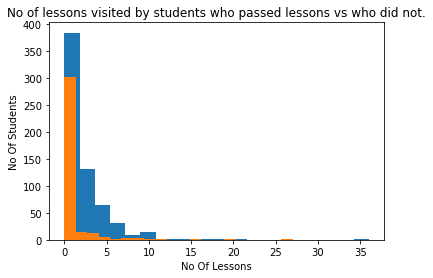

In [72]:
######################################
#                 12                 #
######################################
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data
## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
no_of_minutes = list(sum_grouped_items(group_data(passing_engagement,'account_key'),'total_minutes_visited').values())
no_of_lessons = list(sum_grouped_items(group_data(passing_engagement,'account_key'),'lessons_completed').values())
no_of_projects = list(sum_grouped_items(group_data(passing_engagement,'account_key'),'projects_completed').values())
no_of_projects
non_no_of_minutes = list(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'total_minutes_visited').values())
non_no_of_lessons = list(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'lessons_completed').values())
non_no_of_projects = list(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'projects_completed').values())
no_of_minutes
plt.hist(no_of_lessons,bins=20)
plt.xlabel("No Of Lessons")
plt.ylabel("No Of Students")
plt.title("No of lessons visited by students who passed lessons vs who did not.")
plt.hist(non_no_of_lessons,bins=20)

## Making Histograms

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.